In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
path = r"C:\Users\Mihir\8_CAPSTONE PROJECT\og_data\\"

In [3]:
game_events_df = pd.read_excel(path + "game_events.xlsx")

# game_events_df 
## -- CONTAINS SIGNIFICANT ACTIONS TAKEN FOR PLAYERS  (IN EACH GAME)

### MISSING VALUE TREATMENT

In [6]:
game_events_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1849 entries, 0 to 1848
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   game_event_id     1849 non-null   object        
 1   date              1849 non-null   datetime64[ns]
 2   game_id           1849 non-null   int64         
 3   minute            1849 non-null   int64         
 4   type              1849 non-null   object        
 5   player_id         1849 non-null   int64         
 6   description       916 non-null    object        
 7   player_in_id      1155 non-null   float64       
 8   player_assist_id  140 non-null    float64       
dtypes: datetime64[ns](1), float64(2), int64(3), object(3)
memory usage: 130.1+ KB


In [7]:
game_events_df.dtypes

game_event_id               object
date                datetime64[ns]
game_id                      int64
minute                       int64
type                        object
player_id                    int64
description                 object
player_in_id               float64
player_assist_id           float64
dtype: object

In [8]:
## FUNCTION TO SEGREGATE NUMERICAL AND CATEGORICAL COLUMNS FOR EASY EDA
def data_type(df):
    num = df.select_dtypes(include=["int64", "float64"]).columns.tolist()
    cat = [x for x in df.columns if x not in num]
    return num, cat
    
numerical, categorical = data_type(game_events_df)

print("numerical: ", numerical)
print()
print("categorical: ", categorical)

numerical:  ['game_id', 'minute', 'player_id', 'player_in_id', 'player_assist_id']

categorical:  ['game_event_id', 'date', 'type', 'description']


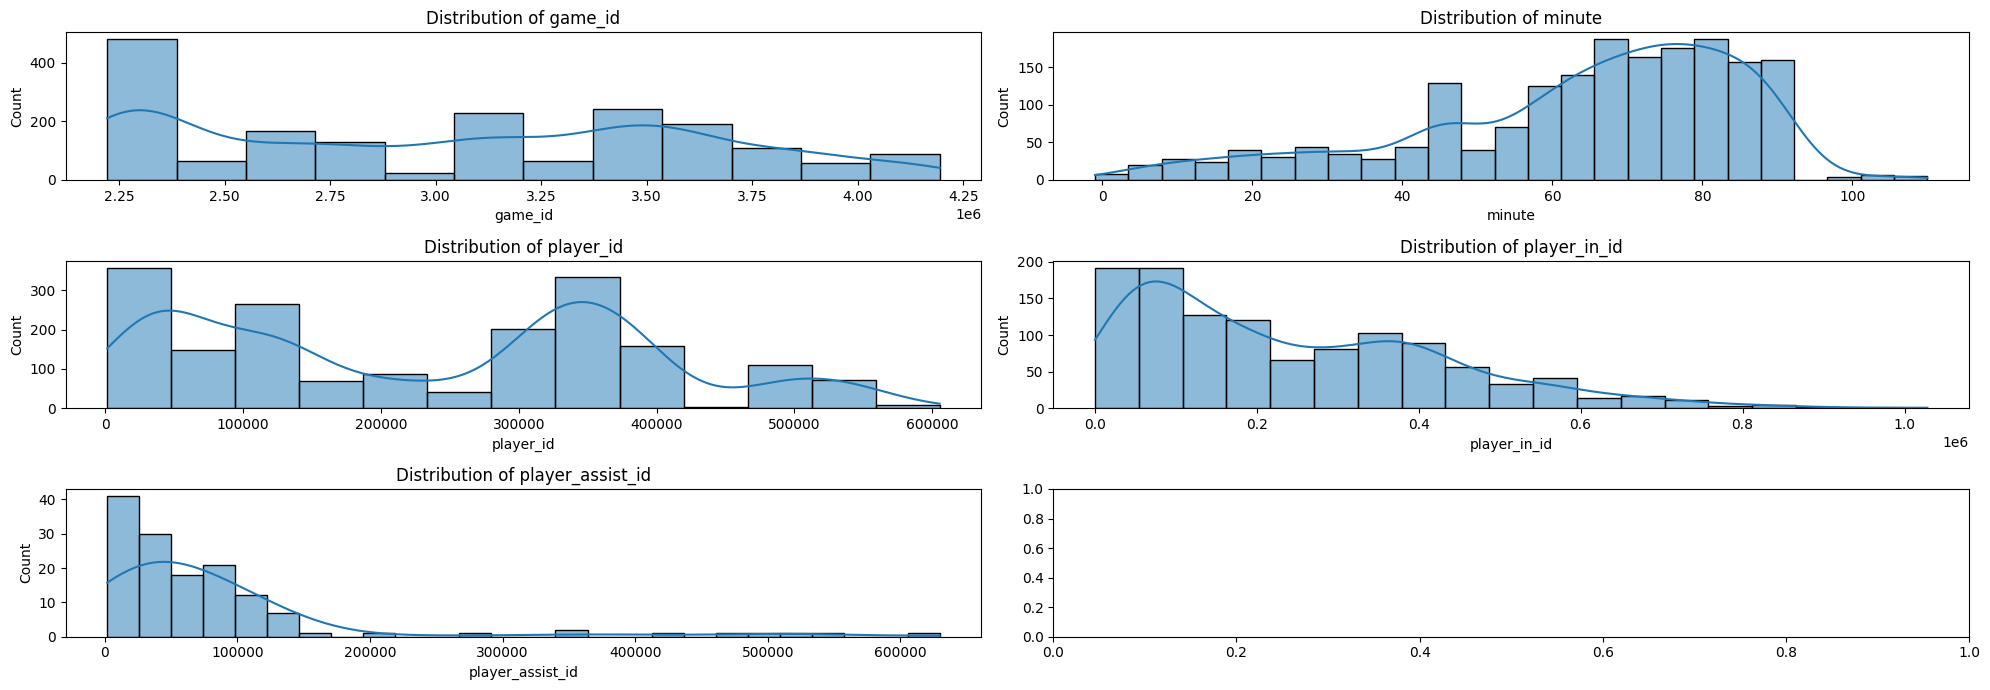

In [9]:
## GETTING THE DISTRIBUTION FOR EACH NUMERICAL COLUMNS FOR MISSING VALUE IMPUTATION
def distribution(df):
    col = 2
    rows = len(numerical)//col + 1
    fig, ax = plt.subplots(rows, 2, figsize=(20, 7))
    ax = ax.flatten()
    
    for i, column in enumerate(df[numerical].columns):
        sns.histplot(data=df[column], kde=True, ax=ax[i])
        ax[i].set_title(f'Distribution of {column}')
    
    # Adjust layout
    plt.tight_layout()
    plt.show()
distribution(game_events_df)

In [10]:
game_events_df[numerical].isnull().sum()

game_id                0
minute                 0
player_id              0
player_in_id         694
player_assist_id    1709
dtype: int64

In [11]:
game_events_df.shape

(1849, 9)

In [12]:
game_events_df.columns

Index(['game_event_id', 'date', 'game_id', 'minute', 'type', 'player_id',
       'description', 'player_in_id', 'player_assist_id'],
      dtype='object')

In [13]:
# DROPPING NAN VALUE COLUMNS
game_events_df.drop(columns = "player_assist_id", axis = 1, inplace = True)
numerical.remove("player_assist_id")

In [14]:
# IMPUTING player_in_id WITH 0 INDICATING NO PLAYER SUBSTITUTION
game_events_df["player_in_id"].fillna(0, inplace = True)

In [15]:
game_events_df["player_in_id"].value_counts()#.sort_index(ascending = True)

player_in_id
0.0         694
117432.0     17
102226.0     12
41511.0      11
187492.0     11
           ... 
349066.0      1
83882.0       1
342793.0      1
282371.0      1
406640.0      1
Name: count, Length: 670, dtype: int64

In [16]:
game_events_df[game_events_df["player_in_id"].isna()]

,game_event_id,date,game_id,minute,type,player_id,description,player_in_id


In [17]:
game_events_df[categorical].isnull().sum()

game_event_id      0
date               0
type               0
description      933
dtype: int64

In [18]:
# IMPUTING EMPTY DESCRIPTIONS WITH "Not Available" 
game_events_df["description"].fillna("Not Available", inplace = True)

In [19]:
game_events_df.isnull().sum()

game_event_id    0
date             0
game_id          0
minute           0
type             0
player_id        0
description      0
player_in_id     0
dtype: int64

### OUTLIER TREATMENT

In [21]:
## COUNTING OUTLIERS IN EACH COLUMNS
def outlier_counts(df, threshold=1.5):
    outlier_count = {}


    for i in df[numerical].columns:
        # Calculate Q1 (25th percentile) and Q3 (75th percentile)
        q1 = df[i].quantile(0.25)
        q3 = df[i].quantile(0.75)

        # Calculate Interquartile Range (IQR)
        iqr = q3 - q1

        # Calculate lower and upper fences
        lf = q1 - (iqr * threshold)
        uf = q3 + (iqr * threshold)

        # Initialize the outlier count for this column
        outlier_count[i] = 0
        
        # Count the number of values below the lower fence and above the upper fence
        lower_outliers = (df[i] < lf).sum()
        upper_outliers = (df[i] > uf).sum()

        # Total outliers is the sum of lower and upper outliers
        outlier_count[i] = lower_outliers + upper_outliers

    return outlier_count
    
outlier_count = outlier_counts(game_events_df)

outlier_count

{'game_id': 0, 'minute': 37, 'player_id': 0, 'player_in_id': 31}

In [22]:
## CHECKING FOR VALID OUTLIER TREATMENT
outlier_count = outlier_counts(game_events_df)
outlier_count

{'game_id': 0, 'minute': 37, 'player_id': 0, 'player_in_id': 31}

### DATATYPE CONVERSION

In [24]:
# with pd.option_context('display.max_rows', None, 'display.max_columns', None):
game_events_df.head()

,game_event_id,date,game_id,minute,type,player_id,description,player_in_id
0,c6a3c088ed8a38d4ce074dd73b20d3da,2012-08-19,2221641,62,Substitutions,1335,", Not reported",45668.0
1,02d605a5c2dc4f9a6721daa583fa5405,2012-08-26,2222536,54,Cards,1321,"1. Yellow card , Foul",0.0
2,b56c2e2e087cddb3cfe9e3d340975df9,2012-11-18,2222707,79,Substitutions,104203,", Tactical",25740.0
3,4a15d1fff4f476f48bb60092c61641d5,2012-11-23,2222721,72,Substitutions,104203,", Tactical",15583.0
4,daa97877f7edf2fda885b411d7197921,2013-05-17,2222782,63,Goals,104203,", Right-footed shot, 1. Goal of the Season Ass...",0.0


In [25]:
for i in game_events_df.columns:
    print(f"{i}-->{game_events_df[i].unique()}")
    print()

game_event_id-->['c6a3c088ed8a38d4ce074dd73b20d3da' '02d605a5c2dc4f9a6721daa583fa5405'
 'b56c2e2e087cddb3cfe9e3d340975df9' ... 'daa31f19aab26eec375884aef73c73b3'
 '869a13060604e769290dafe0b1f14483' '6b7ed06f13c1f67f0d7359c310f20ba0']

date--><DatetimeArray>
['2012-08-19 00:00:00', '2012-08-26 00:00:00', '2012-11-18 00:00:00',
 '2012-11-23 00:00:00', '2013-05-17 00:00:00', '2013-04-14 00:00:00',
 '2012-08-20 00:00:00', '2012-08-27 00:00:00', '2012-09-15 00:00:00',
 '2012-09-21 00:00:00',
 ...
 '2023-08-10 00:00:00', '2023-08-17 00:00:00', '2023-08-18 00:00:00',
 '2023-09-06 00:00:00', '2023-08-22 00:00:00', '2023-10-25 00:00:00',
 '2023-10-04 00:00:00', '2023-11-07 00:00:00', '2023-10-31 00:00:00',
 '2023-11-01 00:00:00']
Length: 1018, dtype: datetime64[ns]

game_id-->[2221641 2222536 2222707 ... 4194147 4194152 4194154]

minute-->[ 62  54  79  72  63  90  65  86  56  32  33  36  48  68  45  12  52  11
  71  82  60  73  38  75  78  85  25  24  74  66   6  84  27  20  81  35
  44  28  37

In [26]:
game_events_df["type"] = game_events_df["type"].astype('category')
game_events_df["player_in_id"] = game_events_df["player_in_id"].astype('int64')

In [27]:
game_events_df.dtypes

game_event_id            object
date             datetime64[ns]
game_id                   int64
minute                    int64
type                   category
player_id                 int64
description              object
player_in_id              int64
dtype: object

In [28]:
game_events_df.to_csv("game_events_df_no_win.csv", index = False)